# Project: Sentences similarity

## Team members:

* Khanh Duong TRAN.
* Brandon NGUELEWI TOUTSAP.

## Goal: Compare two sentences similarity by calculating Cosine similarity
### Main ideas:

#### 1. Vectorize the sentences.
#### 2. Calculate Cosine similarity.
#### 3. Compare the similarity.
#### 4. Visualization between the 2 vectors.

### We will try to compare these two sentences:

 * The sun is shining brightly in the clear blue sky.
 * A bright sunny day with a clear sky.

### After comparing the two sentences, we will see how to implement this with something linked to Data Science field.

### Finally, after understanding the basic of calculating cosine similarity by hand, we would also like to demonstrate how easy the project is with using tools.

#### Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /Users/raydi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/raydi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/raydi/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to /Users/raydi/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

### Vectorize sentences

#### Step includes:
##### 1. Process the sentences.
##### 2. Tokenize the sentences.
##### 3. Convert into array.

##### Process the sentences:
###### Step includes:

###### 1. Remove non-word character such as punctuation, numbers, emojis, etc.
###### 2. Remove redundant spaces.
###### 3. Convert all to lower case.

In [2]:
def process_sentence(sentence: str):
    """ Preprocess the sentence before converting into array.

    Argument:
    sentence: The sentence we want to preprocess.

    Output: Clean sentence.
    """
    cleaned_sentence: str = ""
    only_w: str = ''.join(char for char in sentence if char.isalpha() or char.isspace())
    no_space: str = ' '.join(only_w.split())
    to_lwer: str = no_space.lower()
    cleaned_sentence = to_lwer

    return cleaned_sentence

>Removing non-word characters such as punctuation, numbers, emojis, etc., removing redundant spaces, and converting all to lower case are all preprocessing steps that help to standardize the text data and reduce the dimensionality of the vector space. When comparing sentences, we need only words not numbers or emojis, etc. This makes it easier to compare sentences and find similarities between them.

In [3]:
#Test the function
assert process_sentence("I haVe a nAme20") == "i have a name"

##### Tokenize the sentences:
###### Step includes:

###### 1. Split the sentences into each word individually.
###### 2. Lemmatize each word.
###### 3. Create a vocabulary to vectorize.

In [4]:
#Credit: ChatGPT
def lemmatize_word(word):
    """ Return the word into it most basic form.

    Argument:
    word: Word that needs to be reduced into most basic form.
    """
    lemmatizer = WordNetLemmatizer()

    tag = nltk.pos_tag([word])[0][1][0].lower()
    tag_dict = {"a": wordnet.ADJ,
                "n": wordnet.NOUN,
                "v": wordnet.VERB,
                "r": wordnet.ADV}
    return lemmatizer.lemmatize(word, tag_dict.get(tag, wordnet.NOUN))

In [5]:
def create_vocab(words_list):
    """ Return a dictionary of vocabulary for a list of words

    Argument:
    sentence: List of words that we want to create a dictionary of vocabulary.
    """
    lemmatized_list_of_word = [lemmatize_word(word) for word in words_list]

    unique_word_set: set = set(sorted(lemmatized_list_of_word))
    vocab: dict = {word: index for index, word in enumerate(unique_word_set)}

    return vocab

>This step also helps to standardize the text data and reduce the dimensionality of the vector space. This makes it easier to compare the sentences and find similarities between them. Once the sentences have been tokenized, each word can be lemmatized to reduce it to its base or root form. This helps to further standardize the text data and reduce the dimensionality of the vector space. Finally, a vocabulary can be created to vectorize the text data. Vectorization is the process of converting text data into numerical data and this will enable us to make a visual representation as well.

In [6]:
vocab = create_vocab(["apple", "banana", "apple", "orange", "grape", "banana"])
vocab_2 = create_vocab(["studying", "watching", "was"])

assert 'apple' in vocab
assert 'orange' in vocab
assert 'pear' not in vocab

assert "study" in vocab_2
assert "watch" in vocab_2
assert "be" in vocab_2

##### Convert into array:
###### Base on the created vocabulary to convert a sentence into an array

In [7]:
def vectorize(words_list, vocabulary):
    """ Return the vector of the sentence.

    Argument:
    words_list: list of word to make a vector.
    vocabulary: a dictionary of vocabulary from the sentences.
    """
    sentence_vector: np.ndarray = np.zeros(len(vocabulary))

    for word in words_list:
        if word in vocabulary:
            sentence_vector[vocabulary[word]] += 1

    return sentence_vector

>Converting the sentences into an array is another preprocessing step that helps to standardize the text data and reduce the dimensionality of the vector space. Once the sentences have been tokenized and lemmatized, each word can be converted into an array based on the created vocabulary. This is done so that each word can be represented as a vector in the vector space.

In [8]:
assert np.array_equal(vectorize(["apple", "banana", "apple", "orange", "grape", "banana"], {'apple': 0, 'banana': 1, 'grape': 2, 'orange': 3}), np.array([2, 2, 1, 1]))

#### Putting all together for vectorizing the sentences
##### This section summarizes all the previous steps before proceeding to the Cosine similarity calculation.

In [9]:
def process_sentence(sentence):
    """ Preprocess the sentence and convert into an array of words.

    Argument:
    sentence: The sentence we want to preprocess.

    Output: Array of words.
    """

    #Remove non-word
    cleaned_sentence: str = ''.join(char for char in sentence if char.isalpha() or char.isspace())

    #Remove redundant whitespaces
    cleaned_sentence = ' '.join(cleaned_sentence.split())

    #Convert to lowercase
    cleaned_sentence = cleaned_sentence.lower()

    return cleaned_sentence.split()

def lemmatize_word(word):
    """ Return the word into it most basic form.

    Argument:
    word: Word that needs to be reduced into most basic form.
    """
    lemmatizer = WordNetLemmatizer()

    tag = nltk.pos_tag([word])[0][1][0].lower()
    tag_dict = {"a": wordnet.ADJ,
                "n": wordnet.NOUN,
                "v": wordnet.VERB,
                "r": wordnet.ADV}
    return lemmatizer.lemmatize(word, tag_dict.get(tag, wordnet.NOUN))

def create_vocab(sentences):
    """ Return a dictionary of vocabulary from two sentences

    Argument:
    sentences: List of sentences that we want to create a dictionary of vocabulary.
    """

    words = []
    for sentence in sentences:
        words_arr: np.ndarray = process_sentence(sentence)
        words += words_arr

    lemmatized_list_of_word = [lemmatize_word(word) for word in words]

    unique_word_set: set = set(sorted(lemmatized_list_of_word))
    vocab: dict = {word: index for index, word in enumerate(sorted(unique_word_set))} #using sorted() to make sure each run is consistent.

    return vocab

def vectorize(sentence, vocabulary):
    """ Return the vector of the sentence.

    Argument:
    sentence: The sentence we want to vectorize.
    vocabulary: A dictionary of vocabulary from the predefined sentences.
    """
    sentence_vector: np.ndarray = np.zeros(len(vocabulary))

    words_list: np.ndarray = process_sentence(sentence)
    for word in words_list:
        if word in vocabulary:
            sentence_vector[vocabulary[word]] += 1

    return sentence_vector

In [10]:
sentence_1: str = "The sun is shining brightly in the clear blue sky."
sentence_2: str = "A bright sunny day with a clear sky."

sentences: np.ndarray = np.array([sentence_1, sentence_2])

vocabulary: dict = create_vocab(sentences)
print(vocabulary)

print(vectorize(sentence_1, vocabulary))
print(vectorize(sentence_2, vocabulary))

{'a': 0, 'be': 1, 'blue': 2, 'bright': 3, 'brightly': 4, 'clear': 5, 'day': 6, 'in': 7, 'shin': 8, 'sky': 9, 'sun': 10, 'sunny': 11, 'the': 12, 'with': 13}
[0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 2. 0.]
[2. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1.]


In [11]:
vector_1 = vectorize(sentence_1, vocabulary)
vector_2 = vectorize(sentence_2, vocabulary)

## Calculate Cosine similarity

### The formula is:

$$
\cos(θ) =  \frac{A \cdot B}{\|A\| \times \|B\|}
$$

### Calculate the dot product of two vectors

In [12]:
def calculate_dot_product(vector1, vector2):
    """ Return the dot product of two vectors.

    Argument:
    vector1 and vector2: two vectors.
    """
    dot_product: float = 0

    #Formula: dot = a1*b1 + a2*b2 ... + an*bn, with n is the size of the array.
    dot_product = sum(vector1[i] * vector2[i] for i in range(len(vector1)))

    return dot_product

In [13]:
assert calculate_dot_product(vector_1, vector_2) == np.dot(vector_1, vector_2)

### Calculate the norm of the vectors

In [14]:
def calculate_norm(vector):
    """ Return the norm of a vector.

    Argument:
    vector: Vector we want to calculate the norm.
    """

    #Formula: squared root of the sum squared of all elements in an array.
    sum_ele: int = sum(vector[i] ** 2 for i in range(len(vector)))
    return np.sqrt(sum_ele)

In [15]:
assert calculate_norm(vector_2) == np.linalg.norm(vector_2)

### Finally, calculate the cosine similarity

In [16]:
def cosine_similarity_hand(vector1, vector2):
    """ Return the cosine similarity of two vectors.

    Argument:
    vector1 and vector2: vectors to calculate.
    """
    dot: int = calculate_dot_product(vector1, vector2)
    norm_multi: float = calculate_norm(vector1) * calculate_norm(vector2)

    cosine: float = dot / norm_multi
    cosine_percentage = cosine * 100
    return cosine_percentage

In [17]:
similitude = cosine_similarity_hand(vector_1, vector_2)
similitude

19.999999999999996

## Compare

### We define the threshold for the similarity is 0.5.

## Visualization

In [18]:
def visualize_2_vectors(vector_1, vector_2, similitude):
    """ Visualize the two vectors onto a 2-D dimension space with an angle in between.

    Argument:
    vector_1 and vector_2: The two vectors we want to visualize.
    similitude: The calculated Cosine similarity
    """
    angle_rad = np.arccos(similitude/100)
    angle_deg = np.degrees(angle_rad)

    plt.figure(figsize=(6, 6))

    # Plot Vector 1 as an arrow
    plt.arrow(0, 0, vector_1[0], vector_1[1], color='blue', width=0.05, label='Vector 1', alpha=0.5)
    # Plot Vector 2 as an arrow
    plt.arrow(0, 0, vector_2[0], vector_2[1], color='orange', width=0.05, label='Vector 2', alpha=0.5)

    plt.xlim(-0.5, 1.5)
    plt.ylim(-0.5, 1.5)

    # Add the angle between vectors as text annotation
    plt.text(0.1, 1.2, f'Angle: {angle_deg:.2f}°', fontsize=12)

    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('Vector Representation and Angle')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    plt.show()

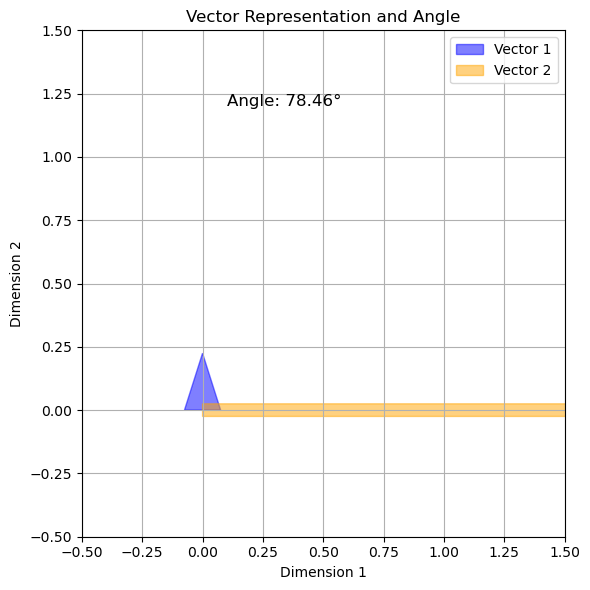

In [19]:
visualize_2_vectors(vector_1, vector_2, similitude)

>By implementing the cosine similarity formula directly (hard-coding), we observed variations in our results, such as fluctuations in the cosine angle and the degree of similarity. In order to address this issue and obtain more reliable results, we opted to introduce a more optimized approach to calculate cosine similarity.

## An interactive way that can take user input to compare

#### We also made an interactive version so you can test this by yourself. Note that, since we coded this by hand, it would not be as robust as using libraries' tools.

#### We suggest you tried to increase the complexity of sentences to test our codes.

#### Simply convert the below code cell into code by using `Esc` + `y`.

sen_1: str = input("Enter your first sentence: ")
sen_2: str = input("Enter your second sentence: ")
arr_sens: np.ndarray = np.array([sen_1, sen_2])

print(sen_1)
print(sen_2)

user_input_vocab: dict = create_vocab(arr_sens)

vec_1 = vectorize(sen_1, user_input_vocab)
vec_2 = vectorize(sen_2, user_input_vocab)

similarity: float = cosine_similarity_hand(vec_1, vec_2)
print(similarity)

visualize_2_vectors(vec_1, vec_2, similarity)

## An addition to the project

### Now that we see how the cosine similarity works and how we can leverage it into determine whether a text is positive or negative.

### This is a subset of Data Science domain called **Sentiment Analysis**, frequently used to help improve Brands/products reputations on the market.

### Main idea:

#### 1. Pre-defined a positive and negative set of vocabulary to vectorize an unseen review.

#### 2. Calculate the cosine similarity between positive/negative and unseen review.

#### 3. Compare the two cosine, the higher *score* means it is positive or negative.

In [20]:
#Taken some random reviews for vocabulary creation
positive_reviews = [
    "This product is amazing! It exceeded all my expectations.",
    "I love this app! It's so easy to use and has all the features I need.",
    "The service was excellent and the staff was very friendly.",
    "The food at this restaurant is delicious and the atmosphere is great.",
    "I had a wonderful experience with this company. Their customer support is top-notch.",
    "I'm impressed with the quality of this product. It's worth every penny.",
    "This book is a must-read! I couldn't put it down.",
    "The hotel staff went above and beyond to make our stay comfortable and enjoyable.",
    "I highly recommend this movie. It's entertaining and well-made.",
    "The concert was fantastic! The artist gave an incredible performance.",
    "This app is a lifesaver! It helped me stay organized and on track.",
    "The customer service team was so helpful and responsive.",
    "I'm so happy with my purchase. The product arrived quickly and in perfect condition.",
    "The staff at this store was friendly and knowledgeable.",
    "The hotel room was clean and spacious. I had a great night's sleep.",
    "I can't say enough good things about this restaurant. The food was outstanding.",
    "I am extremely satisfied with this service. It saved me so much time and effort.",
    "The movie was heartwarming and had a great message.",
    "I had a fantastic time at the amusement park. The rides were thrilling.",
    "This product is a game-changer. It's made my life so much easier.",
]

negative_reviews = [
    "This product is terrible. It broke after just a few days of use.",
    "I'm very disappointed with this app. It keeps crashing and has a lot of bugs.",
    "The service at this restaurant was awful. The staff was rude and unhelpful.",
    "I had a horrible experience with this company. They didn't deliver what they promised.",
    "The food at this place was terrible. It was cold and tasteless.",
    "This book was a waste of time. The plot was confusing and the characters were uninteresting.",
    "The hotel room was dirty and poorly maintained. I would not stay there again.",
    "I regret watching this movie. It was boring and poorly acted.",
    "The concert was a disaster. The sound quality was terrible and the artist seemed uninterested.",
    "I wouldn't recommend this product to anyone. It's not worth the money.",
    "This app is useless. It doesn't do what it's supposed to do.",
    "The customer service was a nightmare. I was put on hold for hours.",
    "I was really disappointed with the quality of the product. It fell apart after a few uses.",
    "The food at this restaurant was overpriced and tasted bland.",
    "The book was full of errors and typos. It was poorly edited.",
    "The hotel was noisy and I couldn't sleep well.",
    "The movie was a complete waste of time. The plot was predictable.",
    "I had a terrible experience with the delivery service. My package was lost.",
    "The amusement park was crowded and the lines were ridiculously long.",
    "This product is a scam. It doesn't work as advertised.",
]

# Create the review vocab to calculate and vectorize
reviews: np.ndarray = positive_reviews + negative_reviews
review_vocabulary: dict = create_vocab(reviews)

# Vectorize the positive and negative reviews individually
positive_vectors = [vectorize(review, review_vocabulary) for review in positive_reviews]
negative_vectors = [vectorize(review, review_vocabulary) for review in negative_reviews]

#Try different unseen review to test, taken from internet
new_review: str = "I recently purchased this product and I have to say I'm impressed. It's exactly what I was looking for and it works perfectly. The customer service was also very helpful when I had a question. I highly recommend it!"
#new_review: str = "I was really disappointed with this product. It didn't work as expected and the customer service was unhelpful. I would not recommend it to others."

# Vectorize the new review
review_vector = vectorize(new_review, review_vocabulary)

# Calculate cosine similarity for the new review with each set of positive and negative reviews
cosine_positive = [cosine_similarity_hand(review_vector, vector) for vector in positive_vectors]
cosine_negative = [cosine_similarity_hand(review_vector, vector) for vector in negative_vectors]

# Determine sentiment based on cosine similarity
print(max(cosine_positive))
print(max(cosine_negative))

if max(cosine_positive) > max(cosine_negative):
    print("Positive review")
else:
    print("Negative review")

54.77225575051661
49.999999999999986
Positive review


## A look at the project with the help of libraries

### So far, the code are written by hand. Most of the cases, the codes output fine. However, there are still cases which we can clearly see the weakness in our code.

### Now that we understand how cosine similarity is calculated when comparing the two sentences. We can try to use Python libraries to test the effectiveness of its.

In [21]:
sent_1: str = "The sun is shining brightly in the clear blue sky."
sent_2: str = "A bright sunny day with a clear sky."
sent: np.ndarray = np.array([sent_1, sent_2])

In [22]:
vectorizor = CountVectorizer(stop_words="english")
vectorized_sentences = vectorizor.fit_transform(sent)

vectorized_sentences_1 = vectorized_sentences[0]
vectorized_sentences_2 = vectorized_sentences[1]

print(vectorized_sentences_1.toarray())
print(vectorized_sentences_2.toarray())

# Calculate the cosine similarity between the two sentences
cosine_similarity_score = cosine_similarity(vectorized_sentences_1, vectorized_sentences_2)

print()
print("Cosine Similarity:", cosine_similarity_score[0][0])

[[1 0 1 1 0 1 1 1 0]]
[[0 1 0 1 1 0 1 0 1]]

Cosine Similarity: 0.36514837167011077


>We see that the cosine similarity is different, a bit higher than our hard-coding cosine. Suggesting a better performance with using the libraries.

### What about the sentiment analysis section, let's also try out the libraries.

#### We would like to see if it will increase in performaces.

>The main goal of the sentiment analysis component in this project is to automatically classify and determine the sentiment expressed in a given text or set of texts. The sentiment analysis task involves using natural language processing (NLP) techniques and specifically the NLTK (Natural Language Toolkit) library to perform this classification.

>The sentiment analysis component will be responsible for identifying the emotional tone or opinion conveyed in the input text as either positive, negative, or neutral(we focused just and positive and negative reviews for this project). It will achieve this by analyzing the words, phrases, and context in the text and applying a machine learning model or lexicon-based approach to make the sentiment classification.


In [23]:
positive_reviews = [
    "This product is amazing! It exceeded all my expectations.",
    "I love this app! It's so easy to use and has all the features I need.",
    "The service was excellent and the staff was very friendly.",
    "The food at this restaurant is delicious and the atmosphere is great.",
    "I had a wonderful experience with this company. Their customer support is top-notch.",
    "I'm impressed with the quality of this product. It's worth every penny.",
    "This book is a must-read! I couldn't put it down.",
    "The hotel staff went above and beyond to make our stay comfortable and enjoyable.",
    "I highly recommend this movie. It's entertaining and well-made.",
    "The concert was fantastic! The artist gave an incredible performance.",
    "This app is a lifesaver! It helped me stay organized and on track.",
    "The customer service team was so helpful and responsive.",
    "I'm so happy with my purchase. The product arrived quickly and in perfect condition.",
    "The staff at this store was friendly and knowledgeable.",
    "The hotel room was clean and spacious. I had a great night's sleep.",
    "I can't say enough good things about this restaurant. The food was outstanding.",
    "I am extremely satisfied with this service. It saved me so much time and effort.",
    "The movie was heartwarming and had a great message.",
    "I had a fantastic time at the amusement park. The rides were thrilling.",
    "This product is a game-changer. It's made my life so much easier.",
]

negative_reviews = [
    "This product is terrible. It broke after just a few days of use.",
    "I'm very disappointed with this app. It keeps crashing and has a lot of bugs.",
    "The service at this restaurant was awful. The staff was rude and unhelpful.",
    "I had a horrible experience with this company. They didn't deliver what they promised.",
    "The food at this place was terrible. It was cold and tasteless.",
    "This book was a waste of time. The plot was confusing and the characters were uninteresting.",
    "The hotel room was dirty and poorly maintained. I would not stay there again.",
    "I regret watching this movie. It was boring and poorly acted.",
    "The concert was a disaster. The sound quality was terrible and the artist seemed uninterested.",
    "I wouldn't recommend this product to anyone. It's not worth the money.",
    "This app is useless. It doesn't do what it's supposed to do.",
    "The customer service was a nightmare. I was put on hold for hours.",
    "I was really disappointed with the quality of the product. It fell apart after a few uses.",
    "The food at this restaurant was overpriced and tasted bland.",
    "The book was full of errors and typos. It was poorly edited.",
    "The hotel was noisy and I couldn't sleep well.",
    "The movie was a complete waste of time. The plot was predictable.",
    "I had a terrible experience with the delivery service. My package was lost.",
    "The amusement park was crowded and the lines were ridiculously long.",
    "This product is a scam. It doesn't work as advertised.",
]

# Create the review vocab to calculate and vectorize
reviews = positive_reviews + negative_reviews
review_vectors = vectorizor.fit_transform(reviews)

# Vectorize the positive and negative reviews individually
positive_vectors = vectorizor.transform(positive_reviews)
negative_vectors = vectorizor.transform(negative_reviews)

#Try different ones.
#new_review: str = "I recently purchased this product and I have to say I'm impressed. It's exactly what I was looking for and it works perfectly. The customer service was also very helpful when I had a question. I highly recommend it!"
new_review: str = "I was really disappointed with this product. It didn't work as expected and the customer service was unhelpful. I would not recommend it to others."

# Vectorize the new review
new_review_vector = vectorizor.transform([new_review])

# Calculate cosine similarity for the new review with each set of positive and negative reviews
cosine_positive = cosine_similarity(new_review_vector, positive_vectors)
cosine_negative = cosine_similarity(new_review_vector, negative_vectors)

print(cosine_positive.max())
print(cosine_negative.max())
print()

# Determine sentiment based on cosine similarity
if cosine_positive.max() > cosine_negative.max():
    print("Positive review")
else:
    print("Negative review")

0.2981423969999719
0.3779644730092272

Negative review


> The libraries' tools output smaller margin of errors, making it better in performance compared to hard-coding.

>Furthermore, sentiment analysis can be integrated into market sentiment analysis, financial analysis, and even political analysis, where understanding public sentiment can drive investment decisions, gauge market sentiment, or predict election outcomes. The ability to analyze vast amounts of text data and extract sentiment-driven insights empowers data scientists to unlock the potential of textual information and use it to drive meaningful and impactful actions in various domains.